## For creating train set and cross validation.

In [6]:
#  we first only consider these attributes RM=6 AGE=7 TAX=10
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline


logDir = './logs/'
datasetPath = '../DATAsets/housing_data/housingdata.csv'

#output Y values
data = load_boston()
target = data.target
df = pd.read_csv(datasetPath,header=None)
#mean normalization:
mean = np.mean(df,axis=0)
sigma = np.std(df,axis=0)
df = (df - mean)/sigma
data_matrix = pd.DataFrame.as_matrix(df)

with tf.name_scope('DATA'):
    data_set = tf.placeholder(tf.float32,shape=(506,14),name='input_dataset')
    train_setX = tf.placeholder(tf.float32,shape=(405,13),name='training_setX')
    train_setY = tf.placeholder(tf.float32,shape=(405,1),name='training_setY')
    cvtest_setX = tf.placeholder(tf.float32,shape=(100,13),name='cvtest_setX')
    cvtest_setY = tf.placeholder(tf.float32,shape=(100,1),name='cvtest_setY')
    
    
#function for generating cvtest and training set with train = 80%
''' Slicing operation in python takes format like this temp[start_index : end_index : step_size ]
    if user leaves blank before the first colon then all the elements from the start are considered.
    e.g. [:80] from the beginning of the array till 80th index.
    if user leaves blank after the colon then all consider all the elements till the end.
    e.g. [80:] from 80th index till the end of the array.
'''
def train_cvtest_data(dataset):
    train = dataset[:405]
    cv = dataset[406:]
    return train,cv

# put all below code before tf.Session()

init_op = tf.global_variables_initializer()
with tf.Session() as sess:
    
    sess.run(init_op)
    #complete input dataset.
    res = sess.run(data_set,feed_dict={data_set:data_matrix})    
    
    # let's create corssvalidation set and training set with train set = 80% and cvtest = 20%
    trainset,cvtestset = train_cvtest_data(res)
    
    
    #divide the data into trainX trainY and cvtestX cvtestY
    with tf.name_scope('CV_and_Test_data'):
        trainX = trainset[:,:13]
        trainY = trainset[:,13]
        cvtestX = cvtestset[:,:13]
        cvtestY = cvtestset[:,13]

## Hypothesis and cost function

Fitting after each 10 steps:
NOTE: Just for displaying after each 10 steps cost is printed, fitting is takes 100 epochs
Epoch:  0  Mean_weight= 0.705738  cost= 21.7177
Epoch:  10  Mean_weight= 0.233684  cost= 0.860253
Epoch:  20  Mean_weight= 0.106104  cost= 0.461943
Epoch:  30  Mean_weight= 0.0498605  cost= 0.355921
Epoch:  40  Mean_weight= 0.018545  cost= 0.313688
Epoch:  50  Mean_weight= -0.000791389  cost= 0.293995
Epoch:  60  Mean_weight= -0.0134187  cost= 0.283926
Epoch:  70  Mean_weight= -0.0219644  cost= 0.278424
Epoch:  80  Mean_weight= -0.0278944  cost= 0.27525
Epoch:  90  Mean_weight= -0.032087  cost= 0.273331
\TRAINING COMPLETE !

Cross Validation testing
error rate =  0.287343


Text(0,0.5,'Predicted Values')

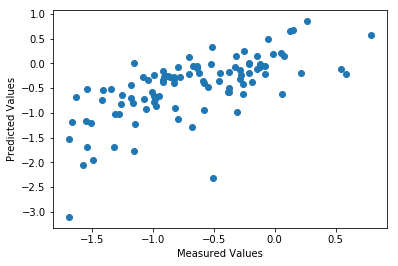

In [7]:
trainY = np.reshape(trainY,(405,1))
cvtestY = np.reshape(cvtestY,(100,1))

#For training.
W = tf.Variable(tf.ones([13,1],dtype=tf.float32),name='Weights')
b = tf.Variable(0,dtype=tf.float32,name='Baises')
h = tf.add(b,tf.matmul(train_setX,W))       #hypothesis.b

# J = tf.divide(tf.reduce_sum(tf.square(tf.subtract(h,train_setY))),tf.multiply(2.00,405.000))
J = tf.reduce_mean(tf.square(tf.subtract(h,train_setY)))
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(J)

h_cv = tf.add(b,tf.matmul(cvtest_setX,W))
J_cv = tf.reduce_mean(tf.square(tf.subtract(h_cv,cvtest_setY)))

cost_hist=[]
costCV_hist = []

init_op  = tf.global_variables_initializer()    #this global initilizers must alwas be present afater decalring variables
with tf.Session() as sess:    
    sess.run(init_op)
    print("Fitting after each 10 steps:")
    print("NOTE: Just for displaying after each 10 steps cost is printed, fitting is takes 100 epochs")
    
    for i in range(100):
        _,c = sess.run([optimizer,J],feed_dict={train_setX:trainX,train_setY:trainY})
        
        if(i%10==0):
            print("Epoch: ",i," Mean_weight=",sess.run(tf.reduce_mean(W))," cost=",c)
            
        cost_hist.append(c)    
        
    print("\TRAINING COMPLETE !")
    
    # Cross validation testing:
    print("\nCross Validation testing")
    res = sess.run(J_cv,feed_dict={cvtest_setX:cvtestX,cvtest_setY:cvtestY})
    print("error rate = ",res)
    
    # getting h and h_cv data for plotting purpose:
    H = sess.run(h,feed_dict={train_setX:trainX})
    H_CV = sess.run(h_cv,feed_dict={cvtest_setX:cvtestX})

fig,ax = plt.subplots()
ax.scatter(cvtestY,H_CV)
ax.set_xlabel('Measured Values')
ax.set_ylabel('Predicted Values')




### Cost function convergence using gradient descent

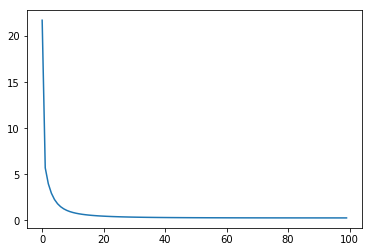

In [8]:
plt.plot(range(len(cost_hist)),cost_hist)